# 가중치 초기화 (Weight Initialization)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch

## 가중치 초기화에 따른 입력값의 분포 변화
- 시각화 함수
- tanh 활성 함수
- ReLU 활성 함수

출처 - https://adityassrana.github.io/blog/theory/2020/08/26/Weight-Init.html

### 시각화 함수

In [ ]:
def visualize(inputs):
    mean, std, hist = [], [], []

    for x in inputs:
        mean.append(x.mean())
        std.append(x.std())
        hist.append(x)
    
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))
    for i, ax, m, s in zip(np.arange(6), axes.flatten(), mean, std):
        ax.hist(hist[i], density=True, bins=50)
        ax.set_xlim(-1.2, 1.2)
        ax.set_title(f'Layer:{i+1} mean:{m:.2f} and std;{s:.2f}')

    plt.tight_layout()

### tanh 활성 함수

#### 가중치 = $N(0, 1)$ * 0.01

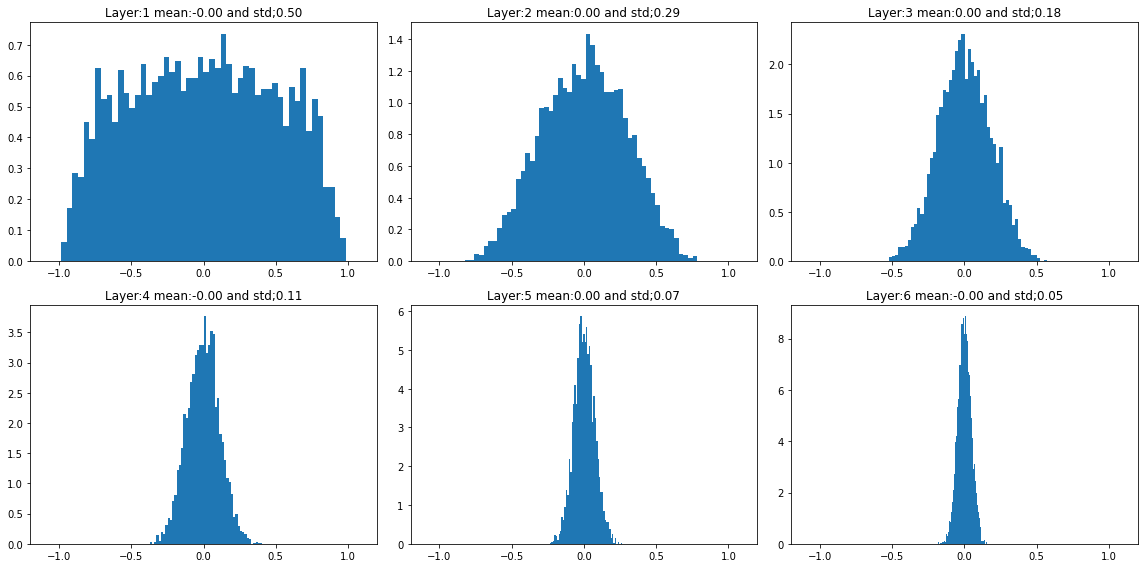

In [ ]:
dims = [4096] * 7
inputs = []

x = np.random.randn(dims[0])
for Din, Dout in zip(dims[:-1], dims[1:]):
    W = np.random.randn(Din, Dout) * 0.01
    x = np.tanh(x.dot(W))

    inputs.append(x)

visualize(inputs)

#### 가중치 = $N(0, 1)$ * 0.5

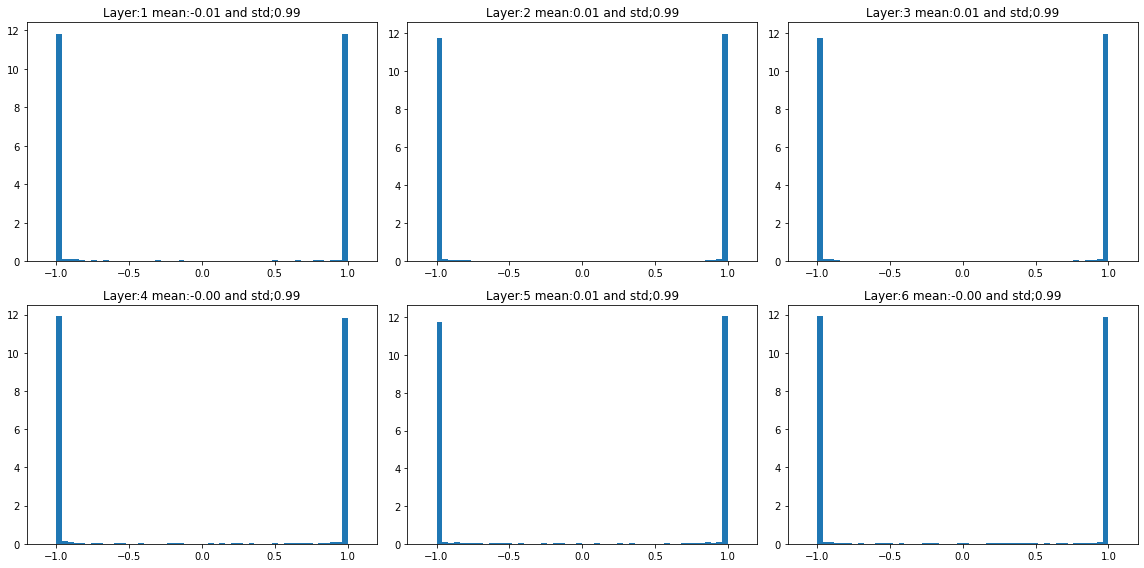

In [ ]:
dims = [4096] * 7
inputs = []

x = np.random.randn(dims[0])
for Din, Dout in zip(dims[:-1], dims[1:]):
    W = np.random.randn(Din, Dout) * 0.5
    x = np.tanh(x.dot(W))

    inputs.append(x)

visualize(inputs)

#### Xavier 초기화

가중치 = $N(0, 1)$ * $\Huge\sqrt{\frac{1}{D_{in}}}$

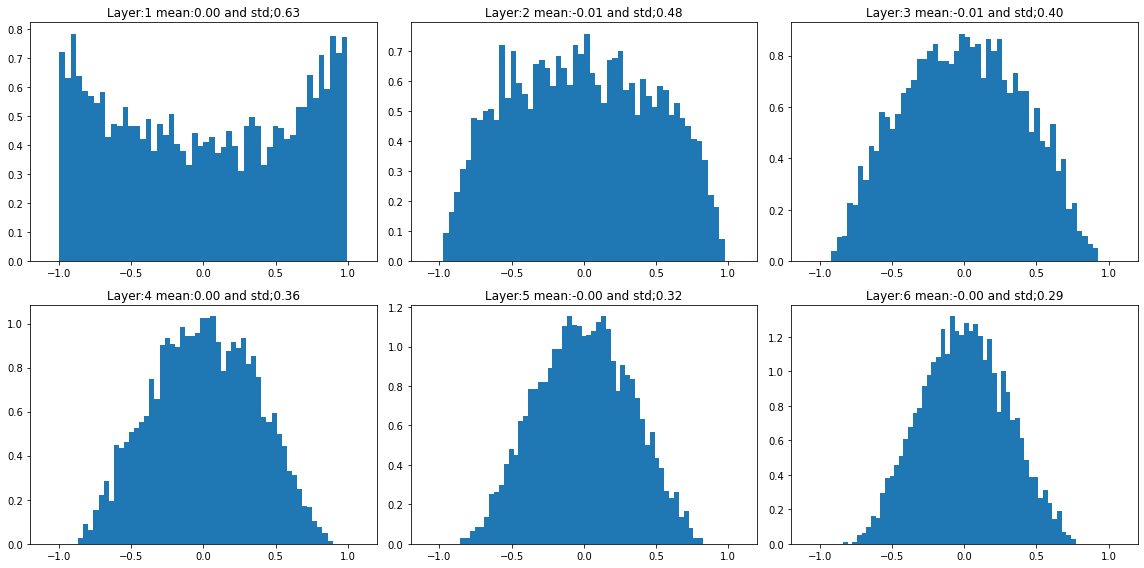

In [ ]:
dims = [4096] * 7
inputs = []

x = np.random.randn(dims[0])
for Din, Dout in zip(dims[:-1],dims[1:]):
    W = np.random.randn(Din, Dout) / np.sqrt(Din)
    x = np.tanh(x.dot(W))

    inputs.append(x)

visualize(inputs)

#### Kaming 초기화

가중치 = $N(0, 1)$ * $\Huge\sqrt{\frac{2}{D_{in}}}$

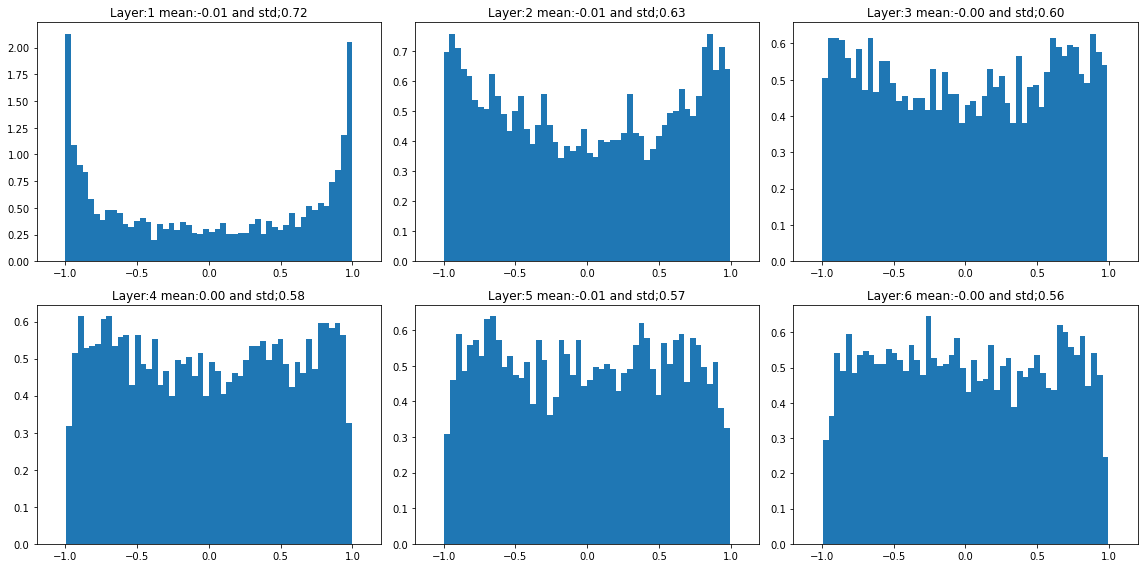

In [ ]:
dims = [4096] * 7
inputs = []

x = np.random.randn(dims[0])
for Din, Dout in zip(dims[:-1],dims[1:]):
    W = np.sqrt(2) * np.random.randn(Din, Dout) / np.sqrt(Din)
    x = np.tanh(x.dot(W))

    inputs.append(x)

visualize(inputs)

### ReLU 활성 함수

In [ ]:
def ReLU(x):
    return np.maximum(0, x)

#### 가중치 = $N(0, 1)$ * 0.01

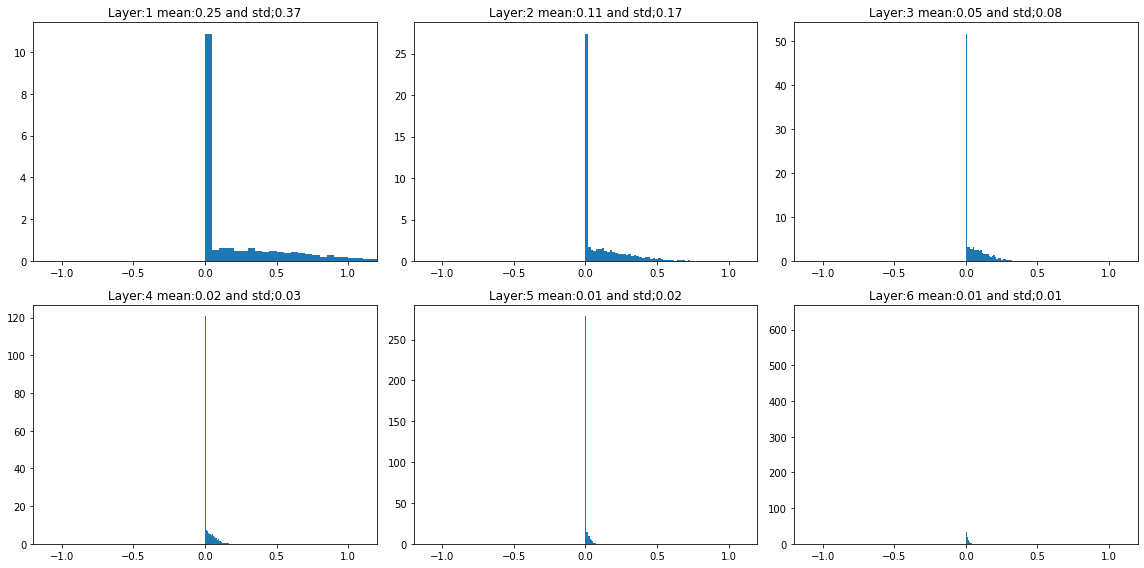

In [ ]:
dims = [4096] * 7
inputs = []

x = np.random.randn(dims[0])
for Din, Dout in zip(dims[:-1], dims[1:]):
    W = np.random.randn(Din,Dout) * 0.01
    x = ReLU(x.dot(W))

    inputs.append(x)

visualize(inputs)

#### 가중치 = $N(0, 1)$ * 0.5

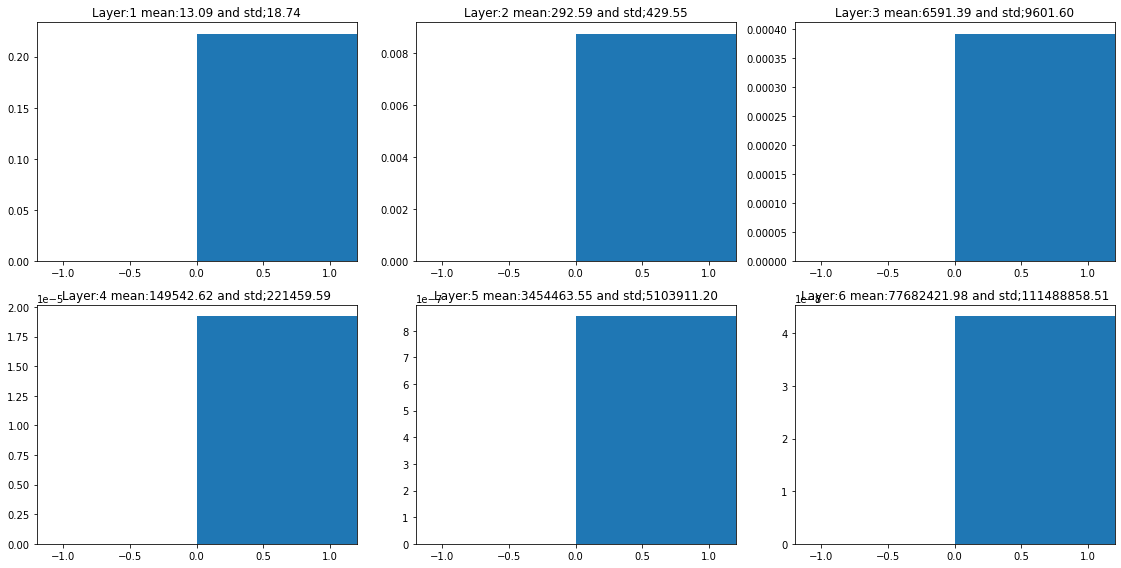

In [ ]:
dims = [4096] * 7
inputs = []

x = np.random.randn(dims[0])
for Din, Dout in zip(dims[:-1], dims[1:]):
    W = np.random.randn(Din, Dout) * 0.5
    x = ReLU(x.dot(W))

    inputs.append(x)

visualize(inputs)

#### Xavier 초기화

가중치 = $N(0, 1)$ * $\Huge\sqrt{\frac{1}{D_{in}}}$

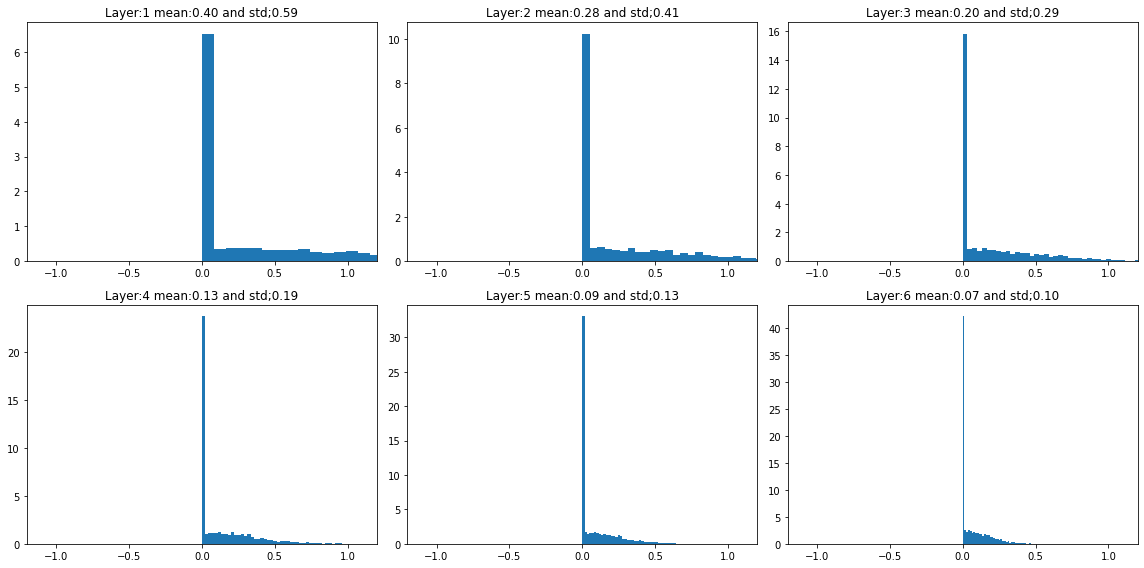

In [ ]:
dims = [4096] * 7
inputs = []

x = np.random.randn(dims[0])
for Din, Dout in zip(dims[:-1],dims[1:]):
    W = np.random.randn(Din, Dout) / np.sqrt(Din)
    x = ReLU(x.dot(W))

    inputs.append(x)

visualize(inputs)

#### Kaming 초기화

가중치 = $N(0, 1)$ * $\Huge\sqrt{\frac{2}{D_{in}}}$

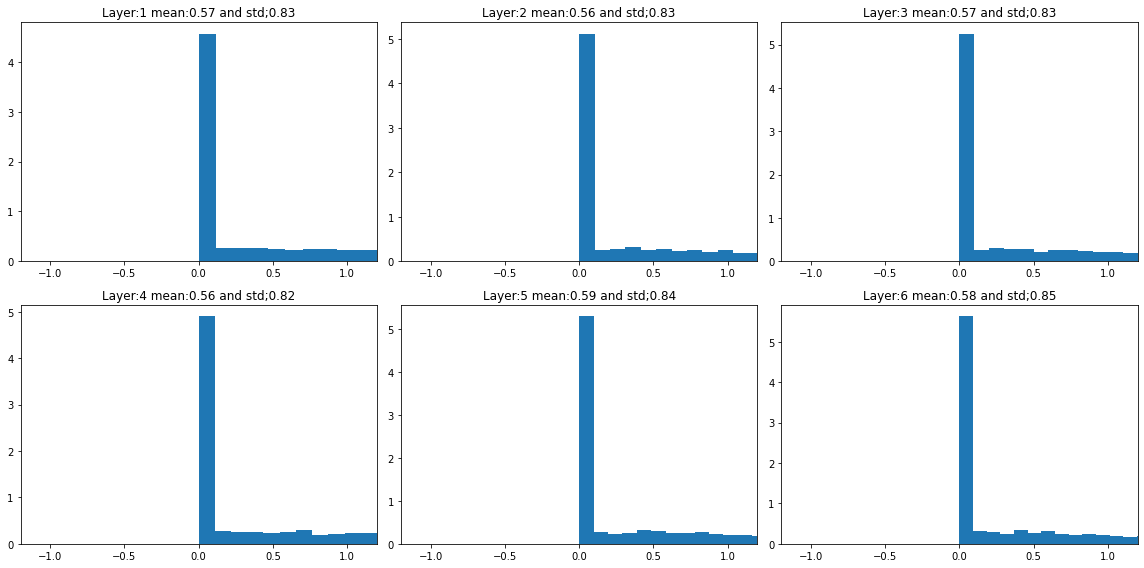

In [ ]:
dims = [4096] * 7
inputs = []

x = np.random.randn(dims[0])
for Din, Dout in zip(dims[:-1],dims[1:]):
    W = np.sqrt(2) * np.random.randn(Din, Dout) / np.sqrt(Din)
    x = ReLU(x.dot(W))

    inputs.append(x)

visualize(inputs)

### Skip Connection
> There are known initialization techniques such as "Gloriot" or "He", but they are based on a "standard" feed-forward architecture model, where outputs of a layer are the inputs of the next one.

그렇다면 ResNet에 사용되는 skip connection을 추가해보자!

#### Kaming 초기화

가중치 = $N(0, 1)$ * $\Huge\sqrt{\frac{2}{D_{in}}}$

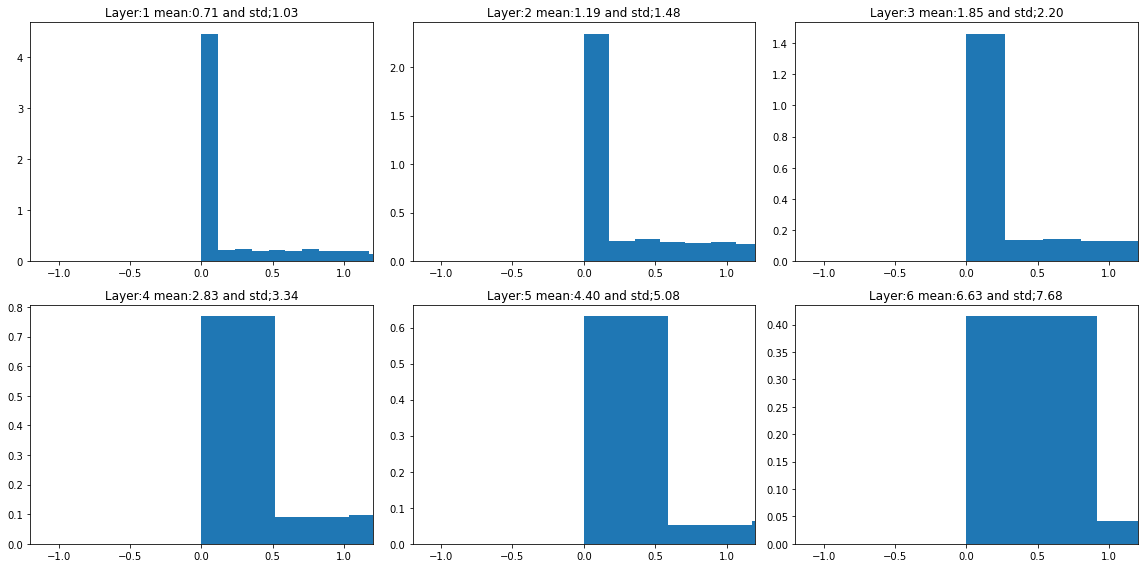

In [ ]:
dims = [4096] * 7
inputs = []

x = np.random.randn(dims[0])
for Din, Dout in zip(dims[:-1],dims[1:]):
    W = np.sqrt(2) * np.random.randn(Din, Dout) / np.sqrt(Din)
    
    # residual connection
    x = ReLU(x.dot(W) + x)

    inputs.append(x)

visualize(inputs)

#### Xavier 초기화

가중치 = $N(0, 1)$ * $\Huge\sqrt{\frac{1}{D_{in}}}$

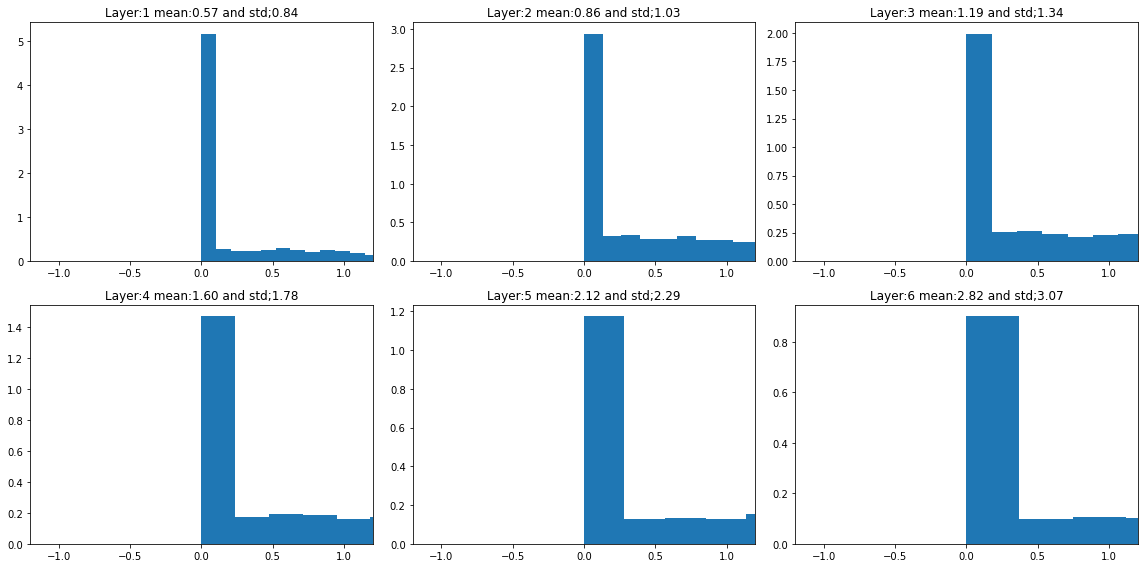

In [ ]:
dims = [4096] * 7
inputs = []

x = np.random.randn(dims[0])
for Din, Dout in zip(dims[:-1],dims[1:]):
    W = np.random.randn(Din, Dout) / np.sqrt(Din)
    
    # residual connection
    x = ReLU(x.dot(W) + x)

    inputs.append(x)

visualize(inputs)

#### Kaiming 초기화, Gain=0.01
가중치 = $N(0, 1)$ * $\Huge Gain\times\sqrt{\frac{2}{D_{in}}}$<br>
$Gain = 0.01$

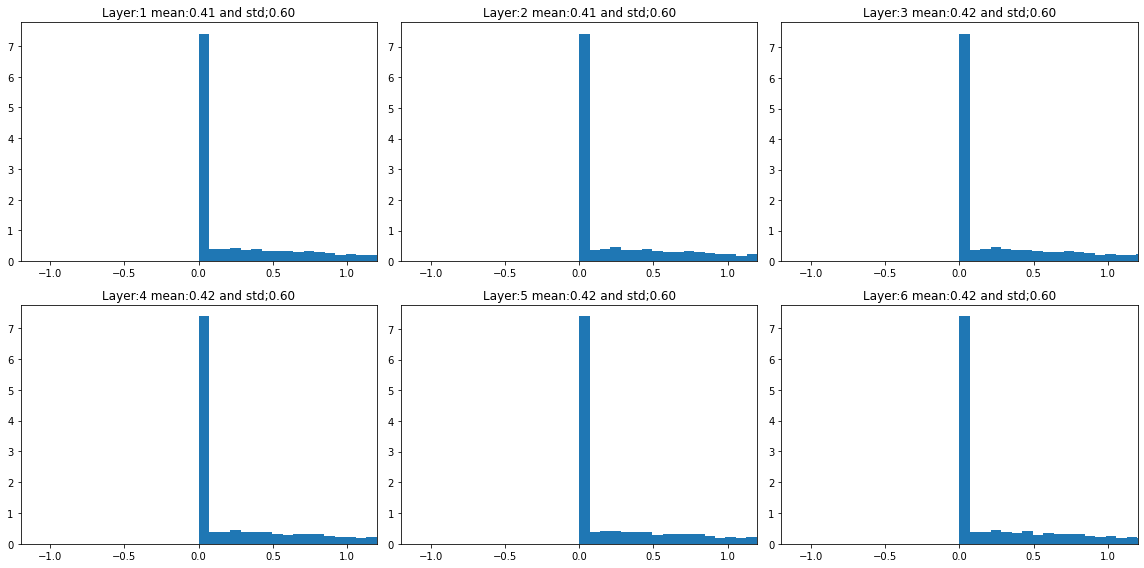

In [ ]:
dims = [4096] * 7
inputs = []

x = np.random.randn(dims[0])
for Din, Dout in zip(dims[:-1],dims[1:]):
    gain = 0.01
    W = gain * np.sqrt(2) * np.random.randn(Din, Dout) / np.sqrt(Din)
    
    # residual connection
    x = ReLU(x.dot(W) + x)

    inputs.append(x)

visualize(inputs)